In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## Lectura del dataset

In [ ]:
df_hist_cred = pd.read_csv("Dataset.csv", sep=";")
df_hist_cred

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Exploracion del dataset

In [ ]:
df_hist_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [ ]:
df_hist_cred[['Nro_prestao_retrasados','Mto_ingreso_mensual','Edad',
              'Nro_creditos_hipotecarios','Nro_retraso_ultm3anios']].describe()

,Nro_prestao_retrasados,Mto_ingreso_mensual,Edad,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios
count,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000
mean,0.421033,6.670221e+03,52.295207,1.018240,0.240387
std,4.192781,1.438467e+04,14.771866,1.129771,4.155179
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,3.400000e+03,41.000000,0.000000,0.000000
50%,0.000000,5.400000e+03,52.000000,1.000000,0.000000
75%,0.000000,8.249000e+03,63.000000,2.000000,0.000000
max,98.000000,3.008750e+06,109.000000,54.000000,98.000000


In [ ]:
df_hist_cred.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Variable Default

In [ ]:
df_hist_cred['Default'].value_counts(normalize= True) * 100

Default
0    93.316
1     6.684
Name: proportion, dtype: float64

In [ ]:
default_1 = df_hist_cred[df_hist_cred['Default'] == 1]

In [ ]:
default_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10026 entries, 0 to 149979
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10026 non-null  int64  
 1   Default                     10026 non-null  int64  
 2   Prct_uso_tc                 10026 non-null  float64
 3   Edad                        10026 non-null  int64  
 4   Nro_prestao_retrasados      10026 non-null  int64  
 5   Prct_deuda_vs_ingresos      10026 non-null  float64
 6   Mto_ingreso_mensual         8357 non-null   float64
 7   Nro_prod_financieros_deuda  10026 non-null  int64  
 8   Nro_retraso_60dias          10026 non-null  int64  
 9   Nro_creditos_hipotecarios   10026 non-null  int64  
 10  Nro_retraso_ultm3anios      10026 non-null  int64  
 11  Nro_dependiente             9847 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 1018.3 KB


In [ ]:
default_1.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,10026.000000,10026.0,10026.000000,10026.000000,10026.00000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.000000,9847.000000
mean,75453.643427,1.0,4.367282,45.926591,2.38849,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208
std,43349.986634,0.0,131.835778,12.916289,11.73451,1238.360283,6171.719674,5.653601,11.762760,1.425723,11.753068,1.219367
min,1.000000,1.0,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38257.250000,1.0,0.398219,36.000000,0.00000,0.193979,2963.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,75283.000000,1.0,0.838853,45.000000,0.00000,0.428227,4500.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,112962.000000,1.0,1.000000,54.000000,2.00000,0.892371,6800.000000,11.000000,1.000000,2.000000,1.000000,2.000000
max,149980.000000,1.0,8328.000000,101.000000,98.00000,38793.000000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


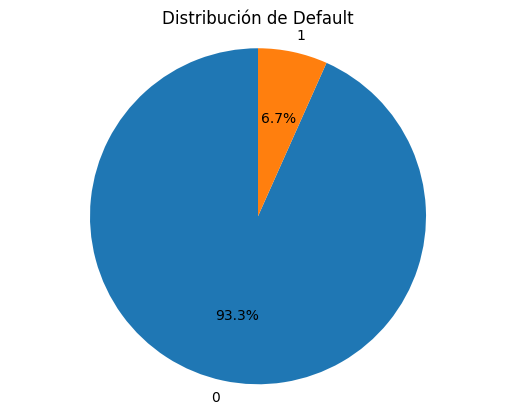

In [ ]:
# Calcular la distribución de Default
gender_count = df_hist_cred["Default"].value_counts(normalize=True) * 100

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribución de Default")
plt.show()


In [ ]:
df_hist_cred.Default.isna().sum()

0

### Variable Prct_uso_tc

In [ ]:
df_hist_cred["Prct_uso_tc"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: Prct_uso_tc
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [ ]:
df_hist_cred["Prct_uso_tc"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: Prct_uso_tc, dtype: float64

In [ ]:
df_hist_cred["Prct_uso_tc"].head()

0    0.766127
1    0.957151
2    0.658180
3    0.233810
4    0.907239
Name: Prct_uso_tc, dtype: float64

In [ ]:
#Revisamos los casos atipicos y maximos
df_hist_cred[df_hist_cred["Prct_uso_tc"] == 50708.000000 ]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
85489,85490,0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0


In [ ]:
#Registros con porcentaje de uso de tarjeta mayores a 100%
df_hist_cred[df_hist_cred["Prct_uso_tc"]>=100]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
293,294,0,2340.0,45,0,0.339333,8333.0,7,0,2,0,2.0
697,698,1,2066.0,58,0,0.271121,6000.0,8,1,1,0,1.0
1991,1992,1,1143.0,44,2,0.547762,6500.0,13,0,4,0,2.0
2331,2332,0,6324.0,59,0,0.136673,11318.0,4,0,1,0,1.0
4278,4279,0,1982.0,33,0,0.144982,8000.0,4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145587,145588,0,7452.0,52,0,0.351365,10000.0,5,0,2,0,3.0
149102,149103,0,6109.0,43,0,0.229902,12500.0,9,0,2,0,0.0
149160,149161,0,22000.0,38,0,1.080020,3973.0,7,0,2,0,3.0
149245,149246,0,771.0,52,0,0.832021,8000.0,13,0,3,0,0.0


In [ ]:
#Registros con porcentaje de uso de tarjeta menores a 100%
df_hist_cred[df_hist_cred["Prct_uso_tc"]<100]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


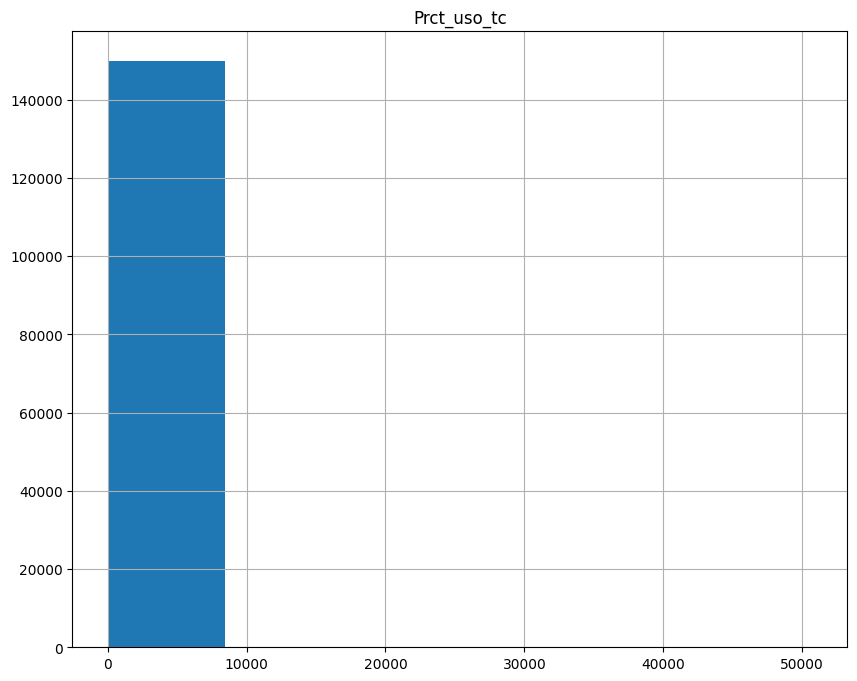

In [ ]:


columns_to_include = ['Prct_uso_tc']
df_hist_cred[columns_to_include].hist(bins = 6, figsize=(10,8))
plt.show()

In [ ]:
df_hist_cred["Prct_uso_tc"].isna().sum()

0

In [ ]:
df_hist_cred["Prct_uso_tc"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: Prct_uso_tc, dtype: float64

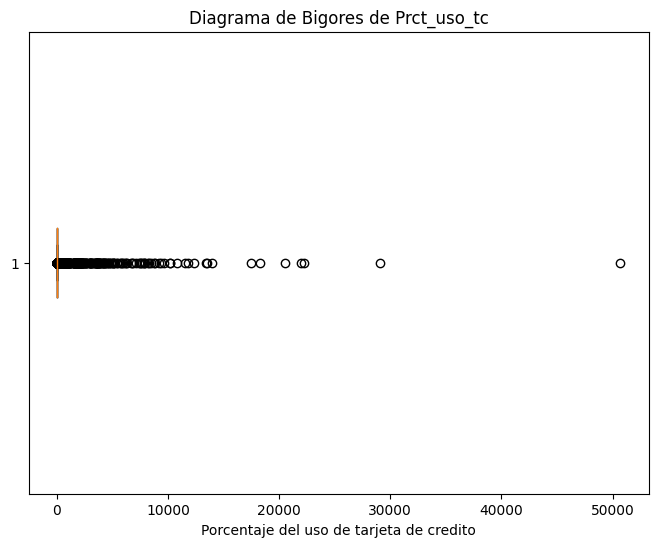

In [ ]:
#Grafico de Bigotes
plt.figure(figsize = (8,6))
plt.boxplot(df_hist_cred["Prct_uso_tc"], vert=False)
plt.title("Diagrama de Bigores de Prct_uso_tc")
plt.xlabel("Porcentaje del uso de tarjeta de credito")
plt.show()

In [ ]:
df_hist_cred["Prct_uso_tc"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: Prct_uso_tc, dtype: float64

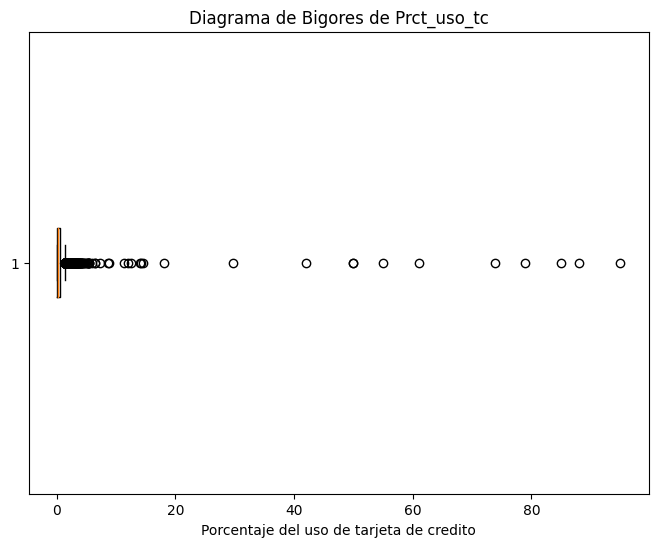

Limite inferior -0.759725788
Limite superior 1.345664228


In [ ]:
#Analisis InterQuartil

df_hist_cred_limpio = df_hist_cred[df_hist_cred["Prct_uso_tc"] <100]

q1 = df_hist_cred_limpio["Prct_uso_tc"].quantile(0.25)
q2 = df_hist_cred_limpio["Prct_uso_tc"].quantile(0.50)
q3 = df_hist_cred_limpio["Prct_uso_tc"].quantile(0.75)

#Rango Interquartil (IQR)
iqr = q3 - q1
outlier_limite_inferior = q1 - 1.5 * iqr
outlier_limite_superior = q3 + 1.5 * iqr

plt.figure(figsize = (8,6))
plt.boxplot(df_hist_cred_limpio["Prct_uso_tc"], vert=False)
plt.title("Diagrama de Bigores de Prct_uso_tc")
plt.xlabel("Porcentaje del uso de tarjeta de credito")
plt.show()

print("Limite inferior", outlier_limite_inferior)
print("Limite superior", outlier_limite_superior)

In [ ]:
df_hist_cred_limpio["Prct_uso_tc"].describe()

count    149777.000000
mean          0.328095
std           0.688832
min           0.000000
25%           0.029795
50%           0.153598
75%           0.556143
max          95.000000
Name: Prct_uso_tc, dtype: float64

### Variable Edad

In [ ]:
df_hist_cred.Edad.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: Edad, dtype: float64

In [ ]:
df_hist_cred.Edad.isna().sum()

0

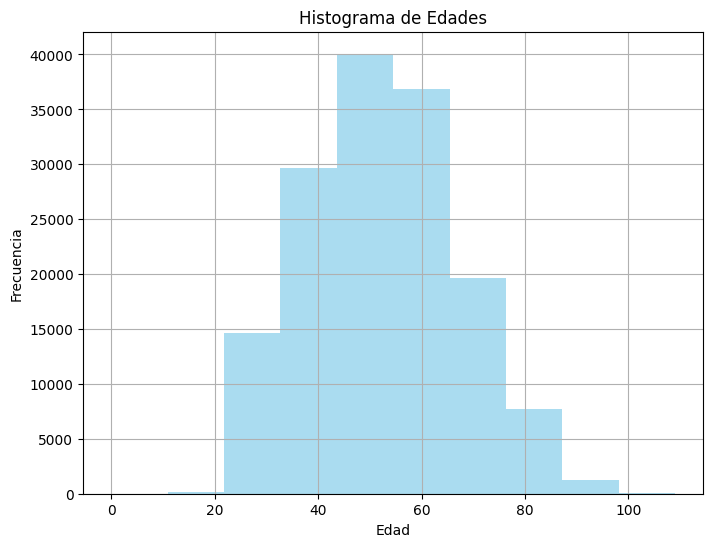

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(df_hist_cred["Edad"], color= "skyblue", bins = 10, alpha=0.7)
plt.title("Histograma de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

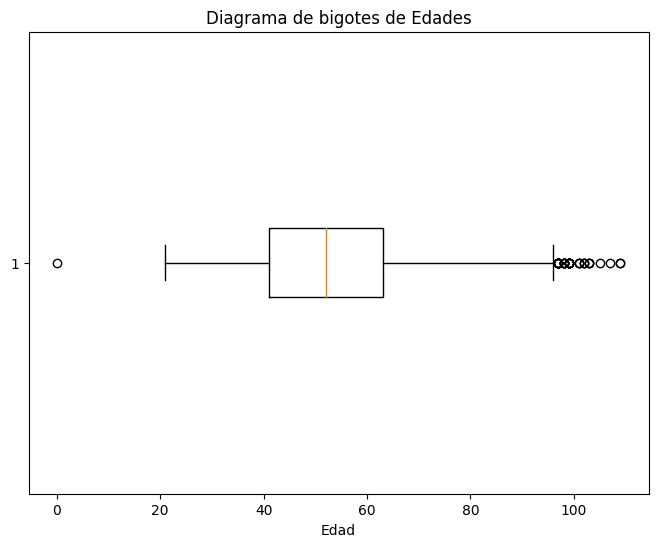

In [ ]:
plt.figure(figsize = (8,6))
plt.boxplot(df_hist_cred["Edad"], vert= False)
plt.title("Diagrama de bigotes de Edades")
plt.xlabel("Edad")
plt.show()

In [ ]:
#Personas con mas de 100 años
df_hist_cred[df_hist_cred["Edad"] >= 100]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19884,19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25561,25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93813,93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96450,96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


### Variable Nro_prestao_retrasados

In [ ]:
df_hist_cred["Nro_prestao_retrasados"]

0         2
1         0
2         1
3         0
4         1
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: Nro_prestao_retrasados, Length: 150000, dtype: int64

In [ ]:
df_hist_cred["Nro_prestao_retrasados"].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Nro_prestao_retrasados, dtype: float64

In [ ]:
df_hist_cred[df_hist_cred["Nro_prestao_retrasados"]==98 ]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
1733,1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3884,3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4417,4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147774,147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149153,149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149239,149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0
149439,149440,1,1.0,34,98,9.0,NaN,0,98,0,98,0.0


In [ ]:
def ha_tenido_prestamo_retraso_3_meses(numero_prestamos):
    if numero_prestamos > 0 and type(numero_prestamos) == int:
        return 1
    else:
        return 0

df_hist_cred['Nro_prestao_retrasados_validacion'] = df_hist_cred['Nro_prestao_retrasados'].apply(lambda x: ha_tenido_prestamo_retraso_3_meses(x))

In [ ]:
df_hist_cred['Nro_prestao_retrasados'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Nro_prestao_retrasados, dtype: float64

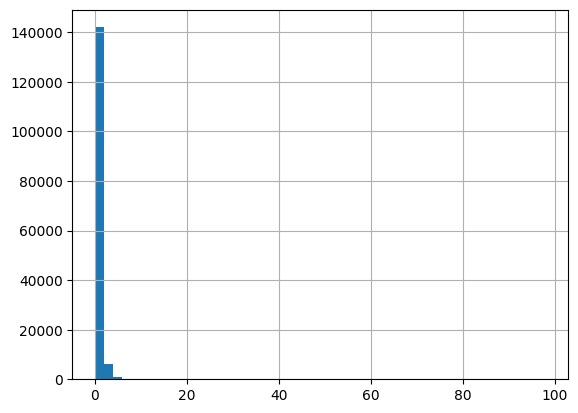

In [ ]:
df_hist_cred['Nro_prestao_retrasados'].hist(bins = 50)
plt.show()

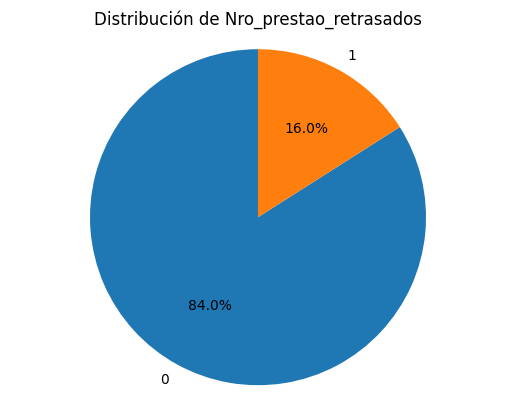

In [ ]:
# Calcular la distribución de cantidad de retrasos en 3 meses en base a 3 años
gender_count = df_hist_cred["Nro_prestao_retrasados_validacion"].value_counts(normalize=True) * 100

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribución de Nro_prestao_retrasados")
plt.show()


### Variable Prct_deuda_vs_ingresos

In [ ]:
df_hist_cred['Prct_deuda_vs_ingresos']

0            0.802982
1            0.121876
2            0.085113
3            0.036050
4            0.024926
             ...     
149995       0.225131
149996       0.716562
149997    3870.000000
149998       0.000000
149999       0.249908
Name: Prct_deuda_vs_ingresos, Length: 150000, dtype: float64

In [ ]:
df_hist_cred['Prct_deuda_vs_ingresos'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: Prct_deuda_vs_ingresos, dtype: float64

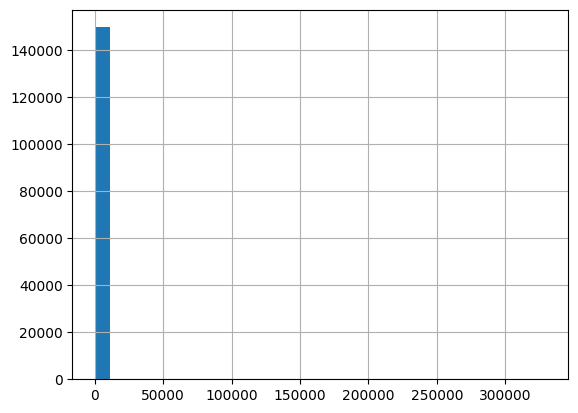

In [ ]:
df_hist_cred['Prct_deuda_vs_ingresos'].hist(bins = 30)
plt.show()

In [ ]:
df_hist_cred[df_hist_cred['Prct_deuda_vs_ingresos'] == 329664.000000]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion
60152,60153,0,0.0,65,0,329664.0,NaN,9,0,3,0,0.0,0


In [ ]:
df_hist_cred['Prct_deuda_vs_ingresos'].mean()

353.00507576386985

In [ ]:
df_hist_cred[df_hist_cred['Prct_deuda_vs_ingresos'] < 1]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,1
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0


In [ ]:
df_hist_cred[df_hist_cred['Prct_deuda_vs_ingresos'] >= 1]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0,0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,0
14,15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0,0
16,17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0,0
25,26,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.000627,76,0,60.000000,NaN,5,0,0,0,0.0,0
149977,149978,0,0.236450,29,0,349.000000,NaN,3,0,0,0,0.0,0
149984,149985,0,0.037548,84,0,25.000000,NaN,5,0,0,0,0.0,0
149992,149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0,0


In [ ]:
def get_bad_row(Prct_deuda_vs_ingresos):
  good = 0
  if Prct_deuda_vs_ingresos <= 1:
    good = 1
  else:
    good = 0
  return good


df_hist_cred['Prct_deuda_vs_ingresos_evaluation'] = df_hist_cred['Prct_deuda_vs_ingresos'].apply(lambda x: get_bad_row(x))

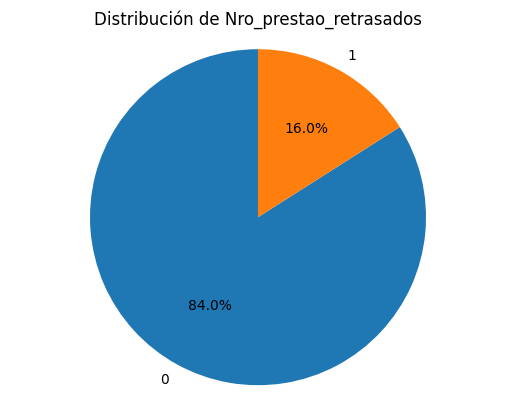

In [ ]:
# Calcular la distribución de cantidad de valores superiores al 100% en la variable Prct_deuda_vs_ingresos
gender_count = df_hist_cred["Nro_prestao_retrasados_validacion"].value_counts(normalize=True) * 100

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribución de Nro_prestao_retrasados")
plt.show()


In [ ]:
#Creo un dataframe solo con valores correctos que van entre 0 a 100%
df = df_hist_cred[df_hist_cred['Prct_deuda_vs_ingresos_evaluation'] == 1 ]

### Variable Mto_ingreso_mensual

In [ ]:
df_hist_cred['Mto_ingreso_mensual']

0          9120.0
1          2600.0
2          3042.0
3          3300.0
4         63588.0
           ...   
149995     2100.0
149996     5584.0
149997        NaN
149998     5716.0
149999     8158.0
Name: Mto_ingreso_mensual, Length: 150000, dtype: float64

In [ ]:
df_hist_cred['Mto_ingreso_mensual'].isna().sum()

29731

In [ ]:
#Revisando si alos montos 0 se les asigna 0 como tal o si se les asigna Nan
df_hist_cred[df_hist_cred['Mto_ingreso_mensual'] == 0]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion,Prct_deuda_vs_ingresos_evaluation
14,15,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0,0,0
50,51,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0,0,0
73,74,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0,0,0
90,91,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0,0,0
298,299,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149383,149384,0,0.239302,63,0,3153.0,0.0,29,0,1,0,0.0,0,0
149562,149563,0,0.230799,72,0,430.0,0.0,7,0,0,0,0.0,0,0
149646,149647,0,0.080084,69,0,1248.0,0.0,8,0,1,0,1.0,0,0
149673,149674,0,0.132362,82,0,4123.0,0.0,14,0,2,0,0.0,0,0


In [ ]:
df_hist_cred[df_hist_cred['Mto_ingreso_mensual'].isna()]

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion,Prct_deuda_vs_ingresos_evaluation
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0,0,0
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN,0,0
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0,0,0
32,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0,0,0
41,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0,0,0
149977,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0,0,0
149984,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0,0,0
149992,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0,0,0


## Limpieza del dataset

### Imputacion de valores faltantes

In [ ]:
df_test_nan_test = df_hist_cred.isna().sum()
print(df_test_nan_test)

ID                                       0
Default                                  0
Prct_uso_tc                              0
Edad                                     0
Nro_prestao_retrasados                   0
Prct_deuda_vs_ingresos                   0
Mto_ingreso_mensual                  29731
Nro_prod_financieros_deuda               0
Nro_retraso_60dias                       0
Nro_creditos_hipotecarios                0
Nro_retraso_ultm3anios                   0
Nro_dependiente                       3924
Nro_prestao_retrasados_validacion        0
Prct_deuda_vs_ingresos_evaluation        0
dtype: int64


In [ ]:
df_hist_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 150000 non-null  int64  
 1   Default                            150000 non-null  int64  
 2   Prct_uso_tc                        150000 non-null  float64
 3   Edad                               150000 non-null  int64  
 4   Nro_prestao_retrasados             150000 non-null  int64  
 5   Prct_deuda_vs_ingresos             150000 non-null  float64
 6   Mto_ingreso_mensual                120269 non-null  float64
 7   Nro_prod_financieros_deuda         150000 non-null  int64  
 8   Nro_retraso_60dias                 150000 non-null  int64  
 9   Nro_creditos_hipotecarios          150000 non-null  int64  
 10  Nro_retraso_ultm3anios             150000 non-null  int64  
 11  Nro_dependiente                    1460

In [ ]:
def calcular_distribucion_normal(df, alpha=0.05):
    resultados = {}

    for columna in df.columns:
        stat, p_valor = shapiro(df[columna])
        resultados[columna] = (stat, p_valor)

        if p_valor > alpha:
            print(f"La columna '{columna}' parece seguir una distribución normal (no se puede rechazar H0)")
        else:
            print(f"La columna '{columna}' no parece seguir una distribución normal (se rechaza H0)")

    return resultados

In [ ]:
calcular_distribucion_normal(df_hist_cred)

La columna 'ID' no parece seguir una distribución normal (se rechaza H0)
La columna 'Default' no parece seguir una distribución normal (se rechaza H0)
La columna 'Prct_uso_tc' no parece seguir una distribución normal (se rechaza H0)
La columna 'Edad' no parece seguir una distribución normal (se rechaza H0)
La columna 'Nro_prestao_retrasados' no parece seguir una distribución normal (se rechaza H0)
La columna 'Prct_deuda_vs_ingresos' no parece seguir una distribución normal (se rechaza H0)
La columna 'Mto_ingreso_mensual' parece seguir una distribución normal (no se puede rechazar H0)
La columna 'Nro_prod_financieros_deuda' no parece seguir una distribución normal (se rechaza H0)
La columna 'Nro_retraso_60dias' no parece seguir una distribución normal (se rechaza H0)
La columna 'Nro_creditos_hipotecarios' no parece seguir una distribución normal (se rechaza H0)
La columna 'Nro_retraso_ultm3anios' no parece seguir una distribución normal (se rechaza H0)
La columna 'Nro_dependiente' parec

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'ID': (0.9549484252929688, 0.0),
 'Default': (0.26919394731521606, 0.0),
 'Prct_uso_tc': (0.0070040225982666016, 0.0),
 'Edad': (0.9912487268447876, 0.0),
 'Nro_prestao_retrasados': (0.05579894781112671, 0.0),
 'Prct_deuda_vs_ingresos': (0.11845004558563232, 0.0),
 'Mto_ingreso_mensual': (nan, 1.0),
 'Nro_prod_financieros_deuda': (0.9302666783332825, 0.0),
 'Nro_retraso_60dias': (0.03321176767349243, 0.0),
 'Nro_creditos_hipotecarios': (0.7470093965530396, 0.0),
 'Nro_retraso_ultm3anios': (0.028524279594421387, 0.0),
 'Nro_dependiente': (nan, 1.0),
 'Nro_prestao_retrasados_validacion': (0.4403432011604309, 0.0),
 'Prct_deuda_vs_ingresos_evaluation': (0.5252006649971008, 0.0)}

In [ ]:
def reemplazar_nulos_con_media(df, columnas):
    df_modificado = df.copy()

    medias = df_modificado[columnas].mean()

    df_modificado[columnas] = df_modificado[columnas].fillna(medias)

    return df_modificado

In [ ]:
df_hist_cred = reemplazar_nulos_con_media(df_hist_cred, columnas= ["Mto_ingreso_mensual", "Nro_dependiente"])
df_test_nan_test = df_hist_cred.isna().sum()
print(df_test_nan_test)

ID                                   0
Default                              0
Prct_uso_tc                          0
Edad                                 0
Nro_prestao_retrasados               0
Prct_deuda_vs_ingresos               0
Mto_ingreso_mensual                  0
Nro_prod_financieros_deuda           0
Nro_retraso_60dias                   0
Nro_creditos_hipotecarios            0
Nro_retraso_ultm3anios               0
Nro_dependiente                      0
Nro_prestao_retrasados_validacion    0
Prct_deuda_vs_ingresos_evaluation    0
dtype: int64


## Feature engineering

In [ ]:
# Monto de egreso mensual
df_hist_cred["Mto_egreso_mensual"] = df_hist_cred['Prct_deuda_vs_ingresos'] * df_hist_cred['Mto_ingreso_mensual']

# Relación Deuda-Ingresos Mensual (DTI)
df_hist_cred['DTI'] = df_hist_cred['Prct_deuda_vs_ingresos'] / 100  # Suponiendo que 'Prct_deuda_vs_ingresos' está en porcentaje

# Ratio de Uso de Tarjeta de Crédito sobre Límite
df_hist_cred['Credit_Utilization_Ratio'] = df_hist_cred['Prct_uso_tc'] / 100  # Suponiendo que 'Prct_uso_tc' está en porcentaje

# Ingresos Anuales
df_hist_cred['Ingresos_Anuales'] = df_hist_cred['Mto_ingreso_mensual'] * 12

# Egreso Mensual Relativo al Ingreso Mensual
df_hist_cred['Egreso_Relativo_Ingreso'] = df_hist_cred['Mto_egreso_mensual'] / df_hist_cred['Mto_ingreso_mensual']
df_hist_cred

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Nro_prestao_retrasados_validacion,Prct_deuda_vs_ingresos_evaluation,Mto_egreso_mensual,DTI,Credit_Utilization_Ratio,Ingresos_Anuales,Egreso_Relativo_Ingreso
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,1,1,7.323197e+03,0.008030,0.007661,109440.000000,0.802982
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,0,1,3.168781e+02,0.001219,0.009572,31200.000000,0.121876
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,1,1,2.589149e+02,0.000851,0.006582,36504.000000,0.085113
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,0,1,1.189640e+02,0.000360,0.002338,39600.000000,0.036050
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,1,1,1.584975e+03,0.000249,0.009072,763056.000000,0.024926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0,0,1,4.727749e+02,0.002251,0.000407,25200.000000,0.225131
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0,0,1,4.001283e+03,0.007166,0.002997,67008.000000,0.716562
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0,0,0,2.581376e+07,38.700000,0.002460,80042.654849,3870.000000
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0,0,1,0.000000e+00,0.000000,0.000000,68592.000000,0.000000


### Correlación de las variables

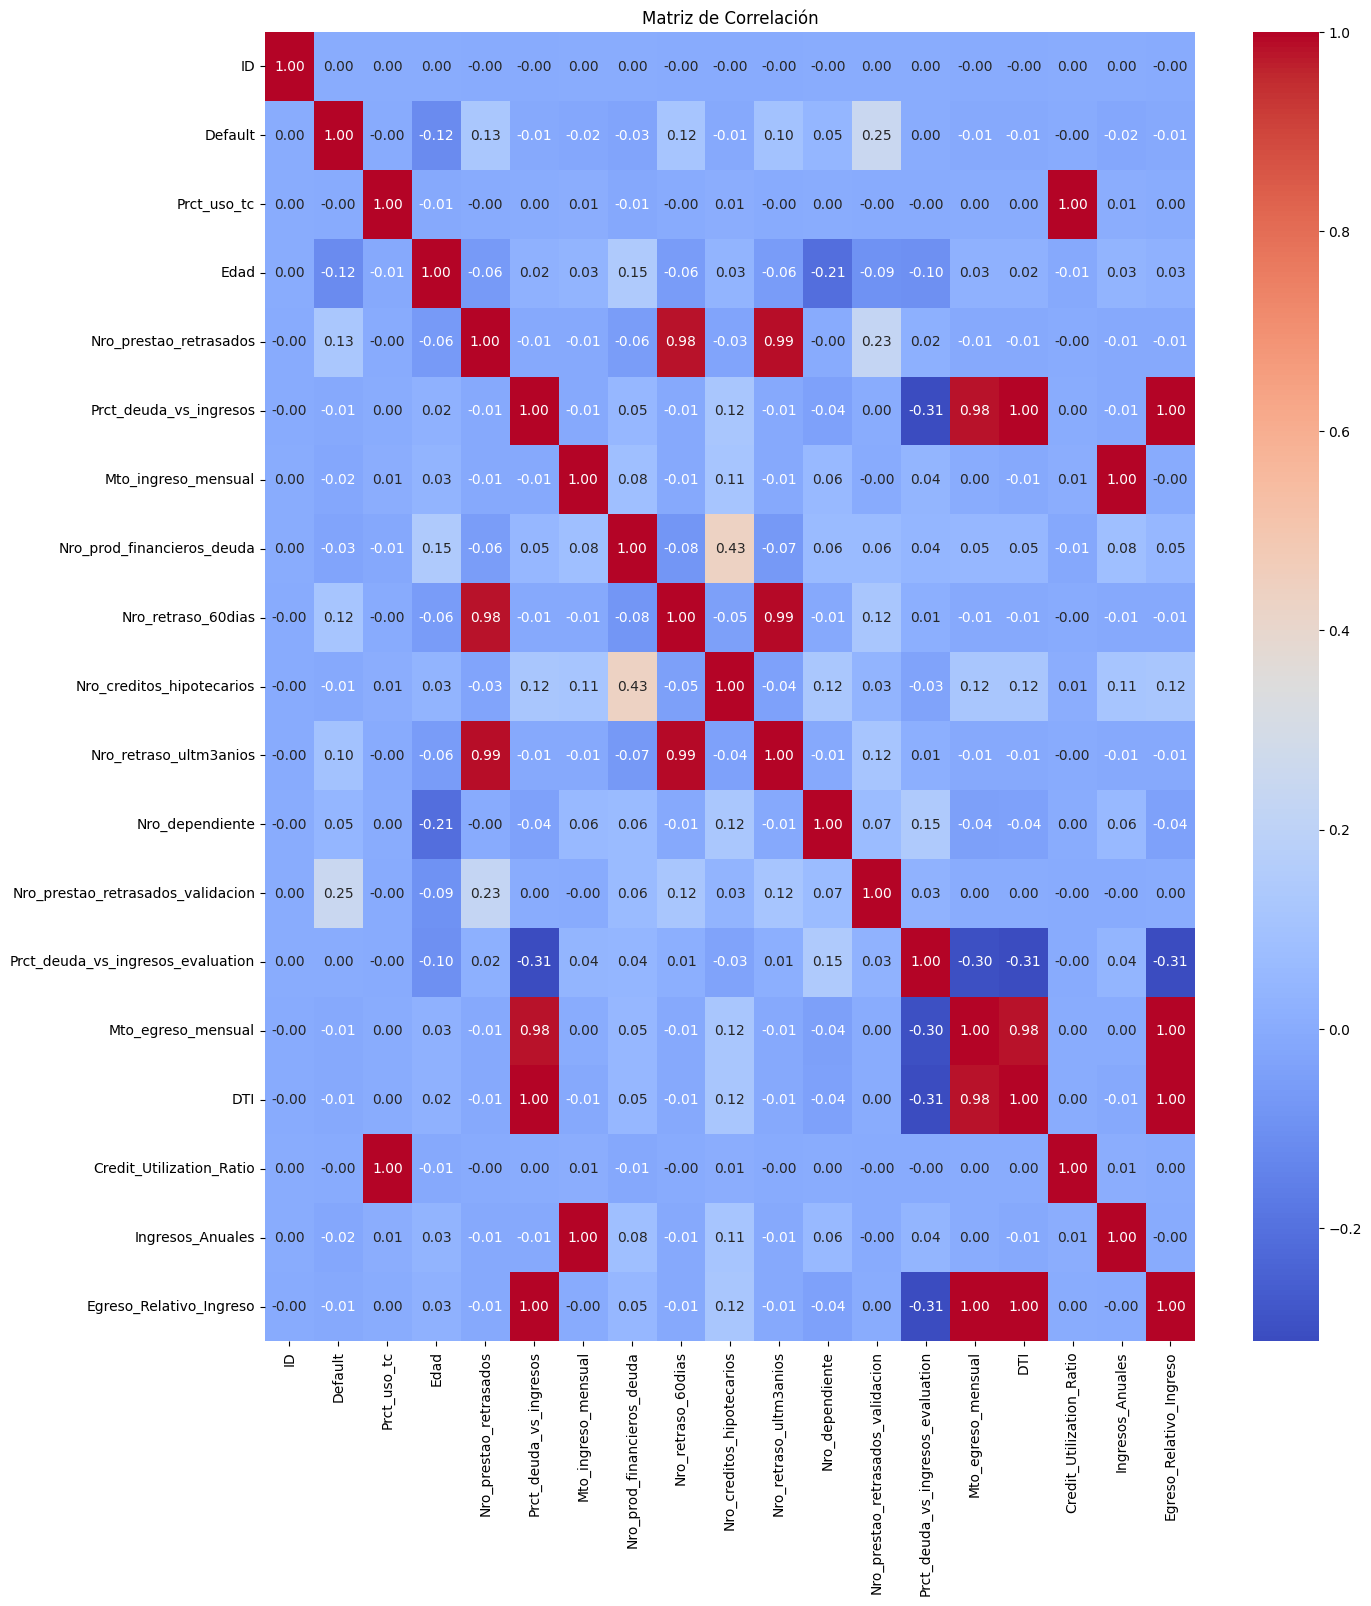

In [ ]:
correlacion = df_hist_cred.corr()
plt.figure(figsize=(15, 17))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## eleccion de variables predictoras

In [ ]:
df_hist_cred_for_pred = df_hist_cred[['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual', 'DTI',
                                     'Nro_creditos_hipotecarios', 'Nro_prod_financieros_deuda', 'Ingresos_Anuales',
                                     'Egreso_Relativo_Ingreso', 'Mto_egreso_mensual']]

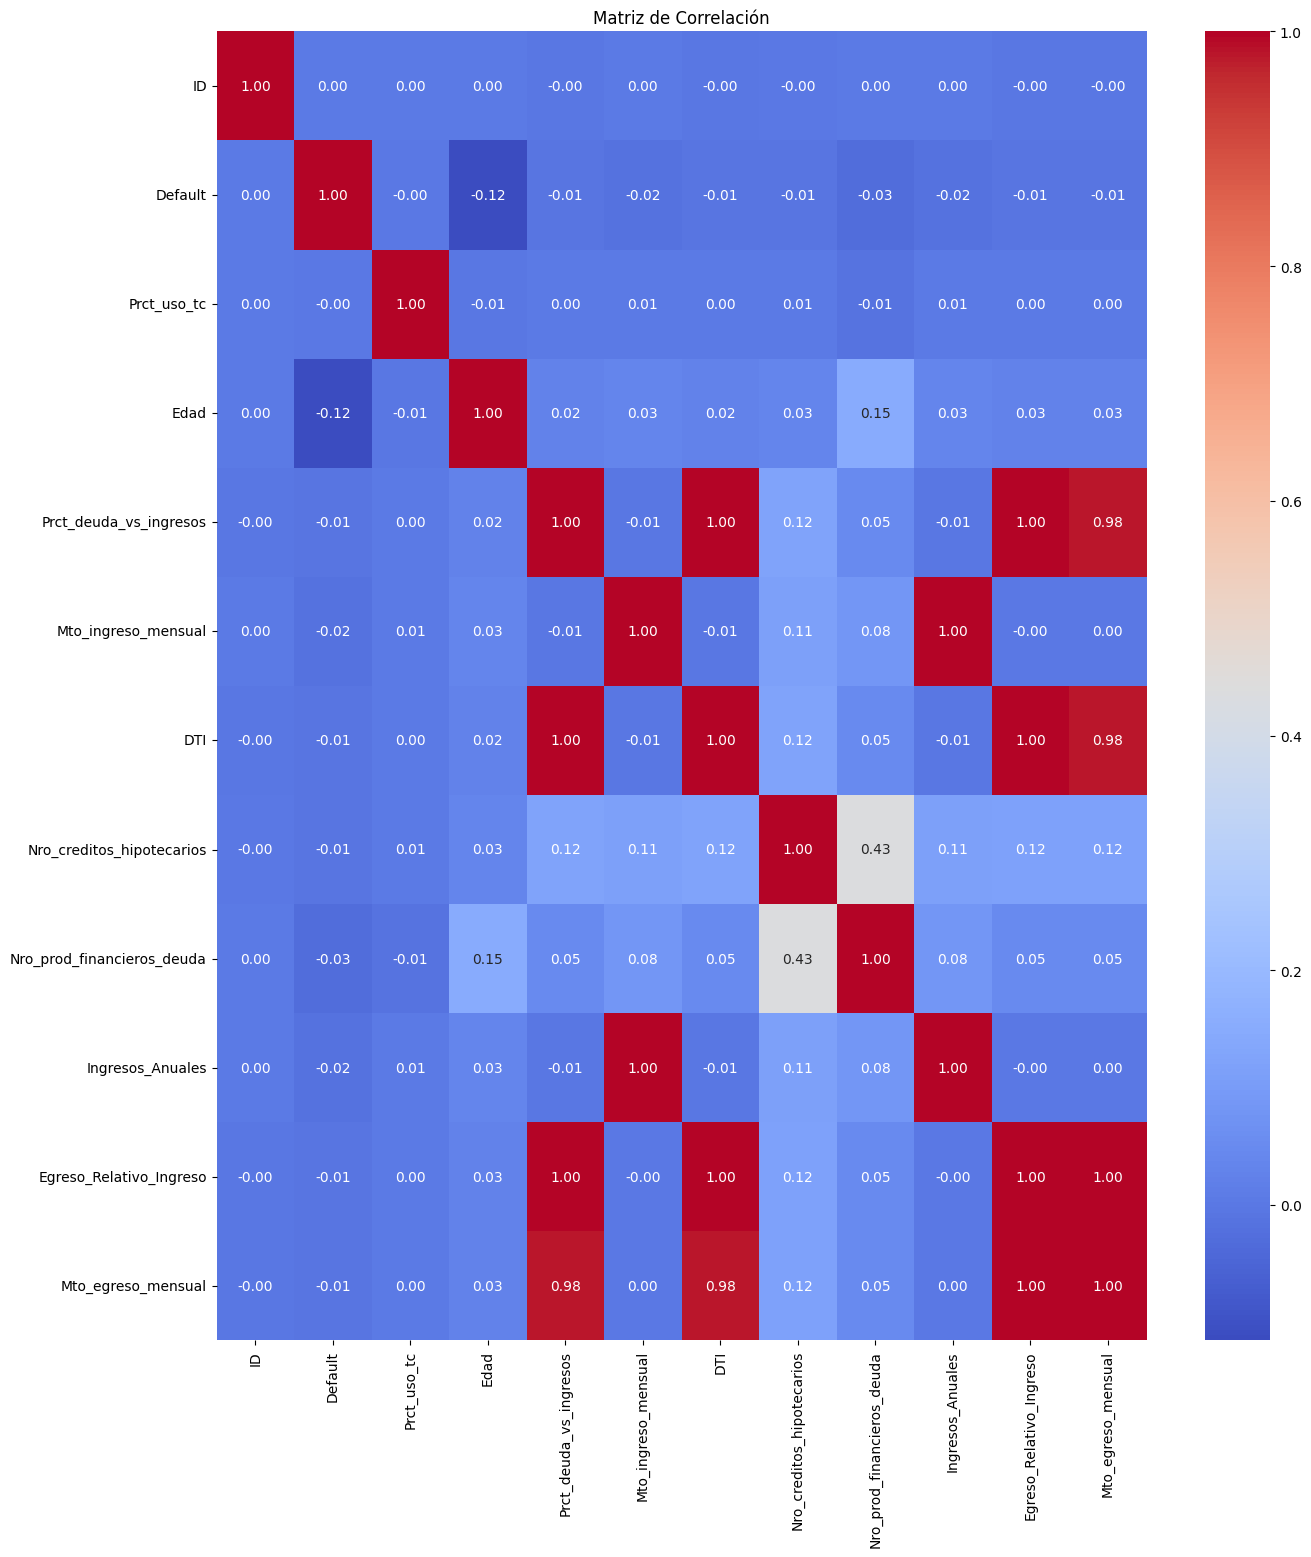

In [ ]:
correlacion = df_hist_cred_for_pred.corr()
plt.figure(figsize=(15, 17))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df_hist_cred['Default'].value_counts()

Default
0    139974
1     10026
Name: count, dtype: int64

In [ ]:
df_hist_cred_for_pred['Default'].value_counts()

Default
0    139974
1     10026
Name: count, dtype: int64

## Modelado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Manejo de valores atípicos (puedes aplicar tu método preferido aquí)

# Estandarización de los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_hist_cred_for_pred.drop('Default', axis=1))

# División en características y variable objetivo
X = scaled_features
y = df_hist_cred_for_pred['Default']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Evaluación del modelo
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9338666666666666


## Evaluacion

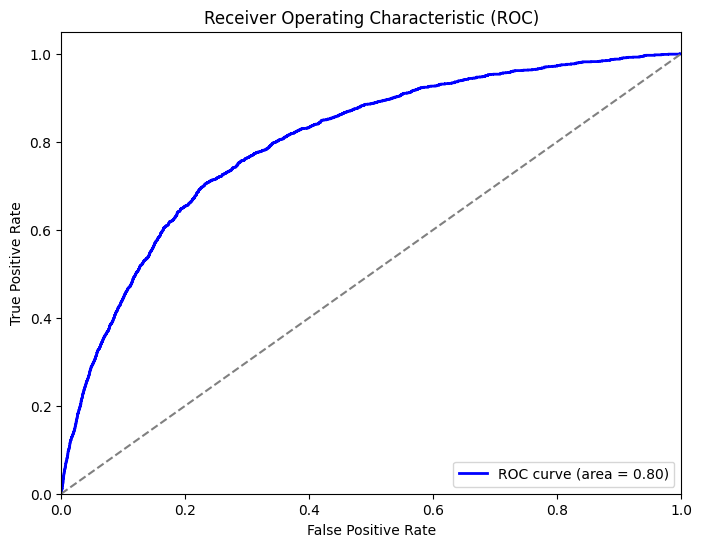

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de la clase positiva (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
